___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [175]:
df = pd.read_csv('Frozen_Dessert_Production.csv',  index_col='DATE', parse_dates = True)
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [176]:
df['Production'] = df['IPN31152N']

In [177]:
df.drop('IPN31152N', axis=1, inplace=True)

In [178]:
df.head()

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


<AxesSubplot:xlabel='DATE'>

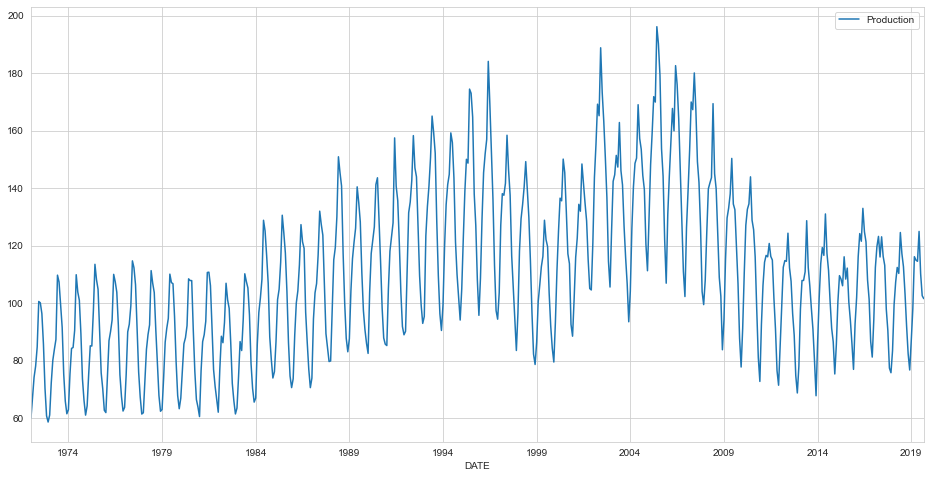

In [180]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [181]:
len(df)

573

In [182]:
test_size=18

In [183]:
test_ind=len(df)-test_size
test_ind

555

In [184]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [185]:
train

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434


In [186]:
test

,Production
DATE,
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584
2018-07-01,117.222
2018-08-01,112.678
2018-09-01,103.312
2018-10-01,92.132
2018-11-01,82.435
2018-12-01,76.761


## Scaling

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
scaler = MinMaxScaler()

In [189]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [190]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [191]:
length = 12
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [192]:
len(generator)

543

# Modelling & Model Performance

## with "tanh" activation function

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [194]:
n_features = train_scaled.shape[1]

In [195]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
#model.add(LSTM(25, activation = 'tanh'))
#model.add(Dropout(0.2))
model.add(Dense(1)) 
model.compile(optimizer = 'adam', loss = 'mse')

In [196]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', patience = 5, restore_best_weights = True)

In [197]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [198]:
model.fit(x = generator,
          epochs = 20,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/20
543/543 [==============================] - 8s 9ms/step - loss: 0.0198 - val_loss: 0.0022
Epoch 2/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0056 - val_loss: 0.0017
Epoch 3/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 4/20
543/543 [==============================] - 4s 8ms/step - loss: 0.0043 - val_loss: 0.0021
Epoch 5/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0040 - val_loss: 0.0063
Epoch 6/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0040 - val_loss: 0.0019
Epoch 7/20
543/543 [==============================] - 4s 7ms/step - loss: 0.0037 - val_loss: 0.0020


<AxesSubplot:>

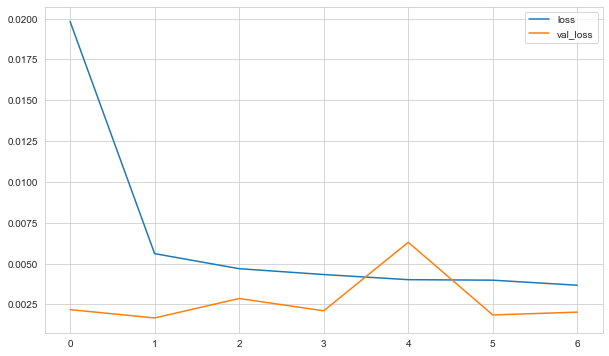

In [199]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [200]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [201]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [202]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    current_pred = model.predict(current_batch)
    
    predictions_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)
  

1/1 [==============================] - 0s 16ms/step


In [203]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.8840061353168135 
mae: 0.02656821586237763 
mse: 0.0013224968573841884 
rmse: 0.036366149883981236


### Inverse Transformation and Comparing

In [204]:
predictions = scaler.inverse_transform(predictions_scaled)

In [205]:
compare = test[:12]

In [206]:
compare['Predictions'] = predictions

In [207]:
compare

,Production,Predictions
DATE,,
2018-04-01,112.431,112.922
2018-05-01,110.354,117.393
2018-06-01,124.584,120.453
2018-07-01,117.222,117.757
2018-08-01,112.678,111.078
2018-09-01,103.312,100.267
2018-10-01,92.132,90.861
2018-11-01,82.435,84.565
2018-12-01,76.761,85.105


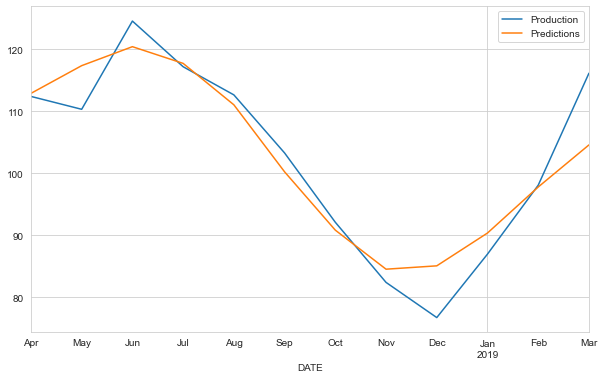

In [208]:
compare.plot();

In [209]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.8840061353168134 
mae: 3.6534989792774106 
mse: 25.00851170967681 
rmse: 5.00085109853081


## with "relu" activation function

In [161]:
model_rlu = Sequential()
model_rlu.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model_rlu.add(LSTM(50, activation = 'relu', return_sequences=True))
model_rlu.add(LSTM(25, activation = 'relu'))
model_rlu.add(Dropout(0.2))
model_rlu.add(Dense(1)) 
model_rlu.compile(optimizer = 'adam', loss = 'mse')

In [162]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', patience = 10, restore_best_weights = True)

In [163]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [164]:
model_rlu.fit(x = generator,
          epochs = 50,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/50
561/561 [==============================] - 10s 10ms/step - loss: 0.0345 - val_loss: 0.0100
Epoch 2/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0154 - val_loss: 0.0067
Epoch 3/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0115 - val_loss: 0.0080
Epoch 4/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0108 - val_loss: 0.0014
Epoch 5/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0103 - val_loss: 0.0016
Epoch 6/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0083 - val_loss: 0.0045
Epoch 7/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0103 - val_loss: 0.0023
Epoch 8/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0081 - val_loss: 0.0016
Epoch 9/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0082 - val_loss: 0.0014
Epoch 10/50
561/561 [==============================] - 5s 9ms/step - loss: 0.0089 - val_loss: 0.00

<AxesSubplot:>

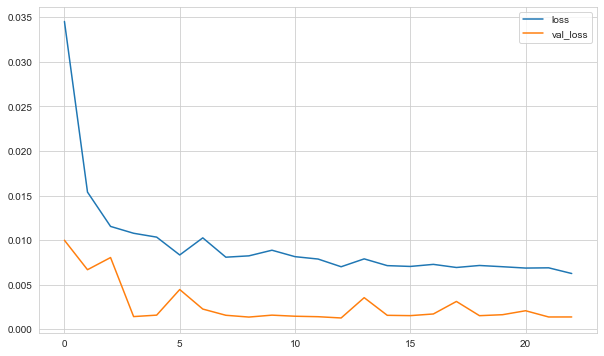

In [165]:
loss_df = pd.DataFrame(model_rlu.history.history)
loss_df.plot()

### Evaluation on Test Data

In [166]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    current_pred = model_rlu.predict(current_batch)
    
    predictions_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 24ms/step


In [167]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.5781733561690046 
mae: 0.06213787866632292 
mse: 0.005260447708746121 
rmse: 0.07252894393789366


### Inverse Transformation and Comparing

In [168]:
predictions = scaler.inverse_transform(predictions_scaled)

In [169]:
compare = test[:12]

In [170]:
compare['Predictions'] = predictions

In [171]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,97.802
2017-11-01,77.438,90.258
2017-12-01,75.812,88.985
2018-01-01,83.434,96.328
2018-02-01,99.490,114.057
2018-03-01,107.315,121.120
2018-04-01,112.431,122.624
2018-05-01,110.354,118.942
2018-06-01,124.584,123.674


<AxesSubplot:xlabel='DATE'>

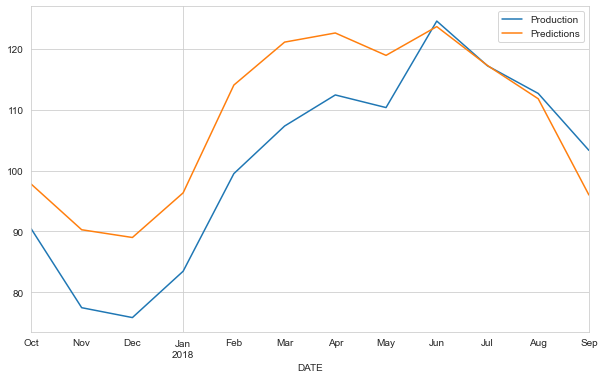

In [172]:
compare.plot()

In [173]:
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.578173356169005 
mae: 8.544822033132858 
mse: 99.47544857121905 
rmse: 9.97373794378111


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [130]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [131]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [132]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 9s 7ms/step - loss: 0.0234
Epoch 2/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0051
Epoch 3/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0045
Epoch 4/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0040
Epoch 5/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0035
Epoch 6/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0039
Epoch 7/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0035
Epoch 8/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0038
Epoch 9/15
561/561 [==============================] - 4s 8ms/step - loss: 0.0033
Epoch 10/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0035
Epoch 11/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0033
Epoch 12/15
561/561 [==============================] - 4s 7ms/step - loss: 0.0031
Epoch 13/15
561/561 [====

In [133]:
forecast_scaled = []

first_eval_batch = scaled_full_data[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    current_pred = model.predict(current_batch)

    forecast_scaled.append(current_pred[0]) 
    
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 16ms/step


In [138]:
forecast = scaler.inverse_transform(forecast_scaled)

In [139]:
forecast_index = pd.date_range(start = '2019-09-01', periods = length, freq = 'MS')

In [140]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

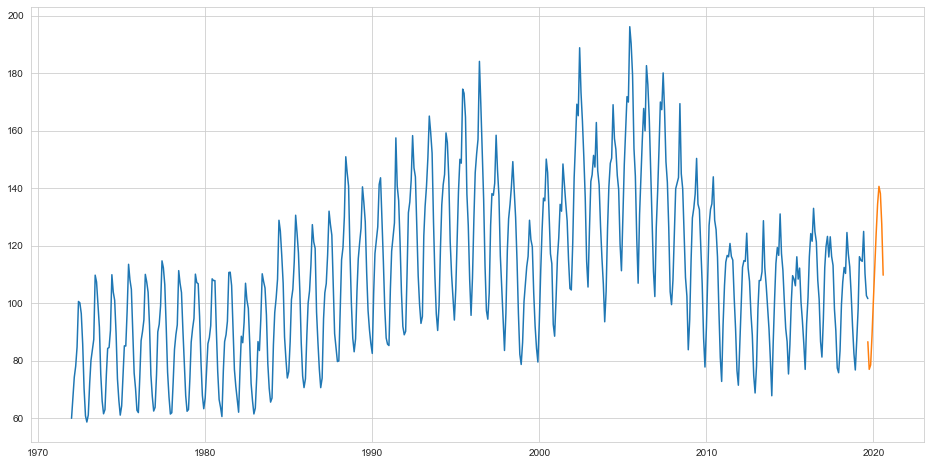

In [141]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

(576.0, 607.0)

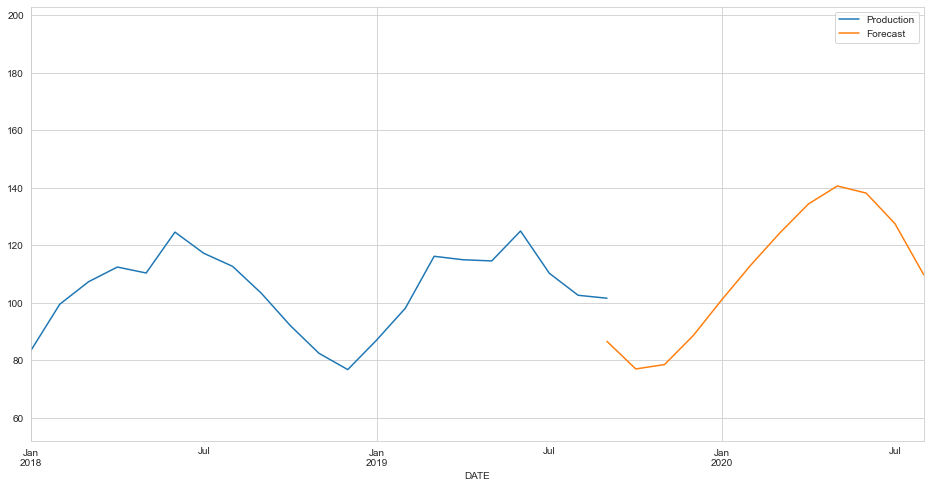

In [142]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-08-01')

In [144]:
dataset_total = pd.concat((df['Production'], forecast_df['Forecast']), axis=0)

<AxesSubplot:>

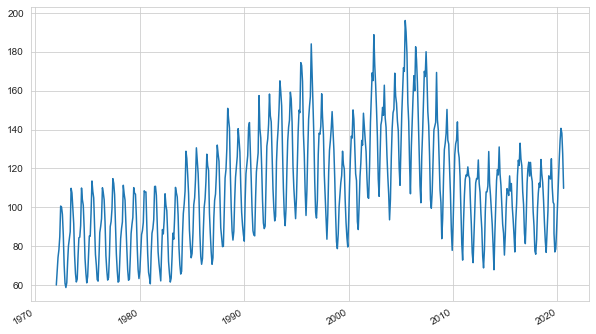

In [145]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___